<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/dynamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


        Date         Open         High          Low        Close    Adj Close  \
0 2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
1 2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2 2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
3 2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
4 2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   

        Volume  
0  18565664997  
1  20802083465  
2  28111481032  
3  18444271275  
4  19725074095  


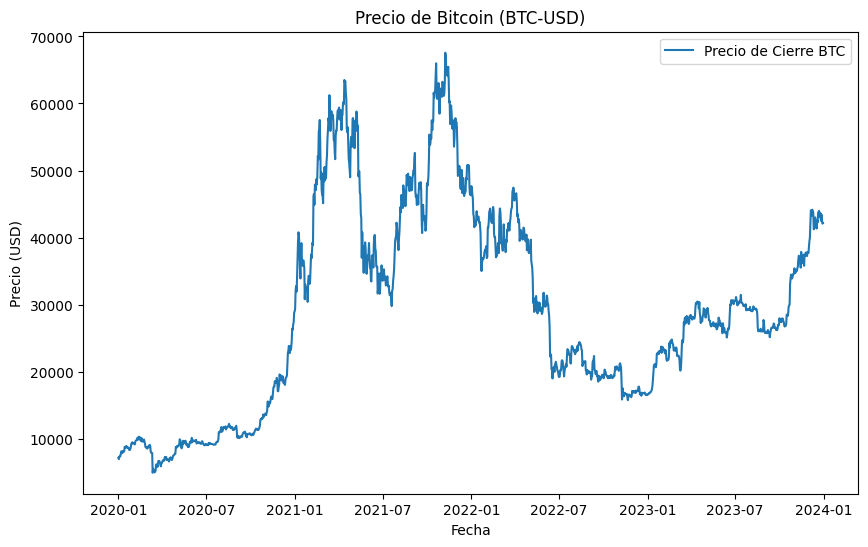

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf



# Descargar datos de Bitcoin con yfinance
data = yf.download('BTC-USD', start='2020-01-01', end='2023-12-31', interval='1d')

# Convertir el índice a columna para tener una columna de fechas
data.reset_index(inplace=True)

# Mostrar los primeros datos
print(data.head())

# Graficar el precio de cierre de BTC
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Precio de Cierre BTC')
plt.title('Precio de Bitcoin (BTC-USD)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()


In [23]:
df = pd.DataFrame({"ds": data["Date"], "y": data["Close"], "unique_id": "Precio"})
df.head()

,ds,y,unique_id
0,2020-01-01,7200.174316,Remesas
1,2020-01-02,6985.470215,Remesas
2,2020-01-03,7344.884277,Remesas
3,2020-01-04,7410.656738,Remesas
4,2020-01-05,7411.317383,Remesas


In [24]:
fecha_2021 = pd.DataFrame({'ds': pd.to_datetime(["2021-07-01"]), '2018_outlier': [1]})
fecha_2020 = pd.DataFrame({'ds': pd.to_datetime(["2022-01-01"]), '2020_outlier': [1]})

In [25]:
df.dtypes

ds           datetime64[ns]
y                   float64
unique_id            object
dtype: object

In [26]:
pip install statsforecast

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\ferna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast

In [28]:
df.head()

,ds,y,unique_id
0,2020-01-01,7200.174316,Remesas
1,2020-01-02,6985.470215,Remesas
2,2020-01-03,7344.884277,Remesas
3,2020-01-04,7410.656738,Remesas
4,2020-01-05,7411.317383,Remesas


In [30]:
df = df.merge(fecha_2021, how='left', on = 'ds').fillna(0)

In [32]:
df = df.merge(fecha_2020, how='left', on = 'ds').fillna(0)

In [33]:
# Create a list with the model and its instantiation parameters
models = [AutoARIMA(season_length=12)]

In [34]:
sf = StatsForecast(df=df,
    models=models,
    freq='D',
    n_jobs=1,
)

C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [35]:
sf.fit()

C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [36]:
from statsforecast.arima import arima_string


In [37]:
arima_string(sf.fitted_[0,0].model_)


'Regression with ARIMA(2,1,2)(1,0,2)[12] errors'

In [38]:
df.tail()


,ds,y,unique_id,2018_outlier,2020_outlier
1455,2023-12-26,42520.402344,Remesas,0.0,0.0
1456,2023-12-27,43442.855469,Remesas,0.0,0.0
1457,2023-12-28,42627.855469,Remesas,0.0,0.0
1458,2023-12-29,42099.402344,Remesas,0.0,0.0
1459,2023-12-30,42156.902344,Remesas,0.0,0.0


In [39]:
x_df = pd.DataFrame({"ds": [pd.to_datetime('2024-01-01'), pd.to_datetime('2024-02-01'), pd.to_datetime('2024-03-01')],
                     "2018_outlier": [0,0,0],
                     "2020_outlier": [0,0,0],
                     "unique_id": ["Remesas", "Remesas", "Remesas"]})
x_df.head()

,ds,2018_outlier,2020_outlier,unique_id
0,2024-01-01,0,0,Remesas
1,2024-02-01,0,0,Remesas
2,2024-03-01,0,0,Remesas


In [40]:
Y_hat_df = sf.forecast(3, X_df=x_df ,fitted=True)
values = sf.forecast_fitted_values()

C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsforecast\core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
C:\Users\ferna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsforecast\core.py:494: FutureWarning: In 

In [41]:
df['autoSarimaX'] = values['AutoARIMA'].values
df.head()

,ds,y,unique_id,2018_outlier,2020_outlier,autoSarimaX
0,2020-01-01,7200.174316,Remesas,0.0,0.0,7192.974146
1,2020-01-02,6985.470215,Remesas,0.0,0.0,7197.979276
2,2020-01-03,7344.884277,Remesas,0.0,0.0,6993.864599
3,2020-01-04,7410.656738,Remesas,0.0,0.0,7337.893478
4,2020-01-05,7411.317383,Remesas,0.0,0.0,7404.401093


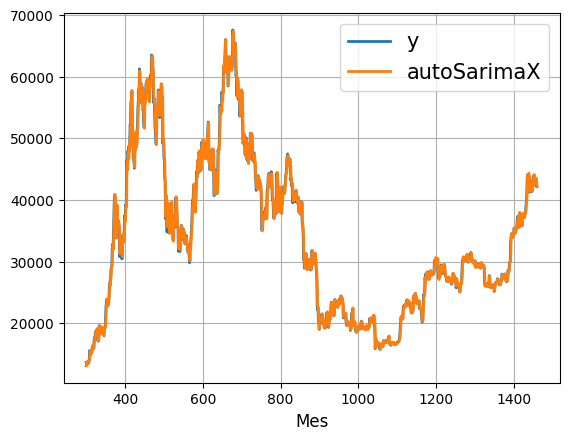

In [44]:
_, ax = plt.subplots(1, 1)
df[['y', 'autoSarimaX']][300:].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)